In [15]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
     results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
  return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

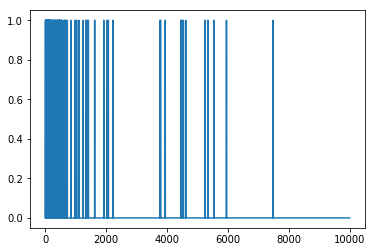

In [17]:
plt.plot(train_data[0])

In [18]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4767 - acc: 0.8118 - binary_crossentropy: 0.4767 - val_loss: 0.3228 - val_acc: 0.8829 - val_binary_crossentropy: 0.3228
Epoch 2/20
 - 3s - loss: 0.2374 - acc: 0.9154 - binary_crossentropy: 0.2374 - val_loss: 0.2827 - val_acc: 0.8881 - val_binary_crossentropy: 0.2827
Epoch 3/20
 - 3s - loss: 0.1736 - acc: 0.9401 - binary_crossentropy: 0.1736 - val_loss: 0.2973 - val_acc: 0.8825 - val_binary_crossentropy: 0.2973
Epoch 4/20
 - 3s - loss: 0.1416 - acc: 0.9517 - binary_crossentropy: 0.1416 - val_loss: 0.3374 - val_acc: 0.8698 - val_binary_crossentropy: 0.3374
Epoch 5/20
 - 3s - loss: 0.1168 - acc: 0.9618 - binary_crossentropy: 0.1168 - val_loss: 0.3459 - val_acc: 0.8729 - val_binary_crossentropy: 0.3459
Epoch 6/20
 - 3s - loss: 0.0963 - acc: 0.9710 - binary_crossentropy: 0.0963 - val_loss: 0.3763 - val_acc: 0.8691 - val_binary_crossentropy: 0.3763
Epoch 7/20
 - 3s - loss: 0.0805 - acc: 0.9766 - binary_crossentropy:

In [0]:
#Lets Create a smaller model and theen comapre it with baseline model

In [21]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6065 - acc: 0.7540 - binary_crossentropy: 0.6065 - val_loss: 0.5171 - val_acc: 0.8355 - val_binary_crossentropy: 0.5171
Epoch 2/20
 - 3s - loss: 0.4265 - acc: 0.8818 - binary_crossentropy: 0.4265 - val_loss: 0.3944 - val_acc: 0.8720 - val_binary_crossentropy: 0.3944
Epoch 3/20
 - 3s - loss: 0.3211 - acc: 0.9044 - binary_crossentropy: 0.3211 - val_loss: 0.3346 - val_acc: 0.8802 - val_binary_crossentropy: 0.3346
Epoch 4/20
 - 3s - loss: 0.2620 - acc: 0.9164 - binary_crossentropy: 0.2620 - val_loss: 0.3039 - val_acc: 0.8859 - val_binary_crossentropy: 0.3039
Epoch 5/20
 - 3s - loss: 0.2243 - acc: 0.9276 - binary_crossentropy: 0.2243 - val_loss: 0.2902 - val_acc: 0.8874 - val_binary_crossentropy: 0.2902
Epoch 6/20
 - 3s - loss: 0.1983 - acc: 0.9349 - binary_crossentropy: 0.1983 - val_loss: 0.2834 - val_acc: 0.8881 - val_binary_crossentropy: 0.2834
Epoch 7/20
 - 3s - loss: 0.1778 - acc: 0.9424 - binary_crossentropy:

In [0]:
#Let's create a bigger model to see how fast it overfits on the data

In [24]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [25]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.3512 - acc: 0.8473 - binary_crossentropy: 0.3512 - val_loss: 0.3242 - val_acc: 0.8652 - val_binary_crossentropy: 0.3242
Epoch 2/20
 - 4s - loss: 0.1459 - acc: 0.9470 - binary_crossentropy: 0.1459 - val_loss: 0.3224 - val_acc: 0.8762 - val_binary_crossentropy: 0.3224
Epoch 3/20
 - 4s - loss: 0.0437 - acc: 0.9876 - binary_crossentropy: 0.0437 - val_loss: 0.4288 - val_acc: 0.8685 - val_binary_crossentropy: 0.4288
Epoch 4/20
 - 4s - loss: 0.0063 - acc: 0.9988 - binary_crossentropy: 0.0063 - val_loss: 0.5784 - val_acc: 0.8692 - val_binary_crossentropy: 0.5784
Epoch 5/20
 - 4s - loss: 6.6937e-04 - acc: 1.0000 - binary_crossentropy: 6.6937e-04 - val_loss: 0.6737 - val_acc: 0.8696 - val_binary_crossentropy: 0.6737
Epoch 6/20
 - 4s - loss: 1.8377e-04 - acc: 1.0000 - binary_crossentropy: 1.8377e-04 - val_loss: 0.7110 - val_acc: 0.8706 - val_binary_crossentropy: 0.7110
Epoch 7/20
 - 4s - loss: 1.1282e-04 - acc: 1.0000 - 

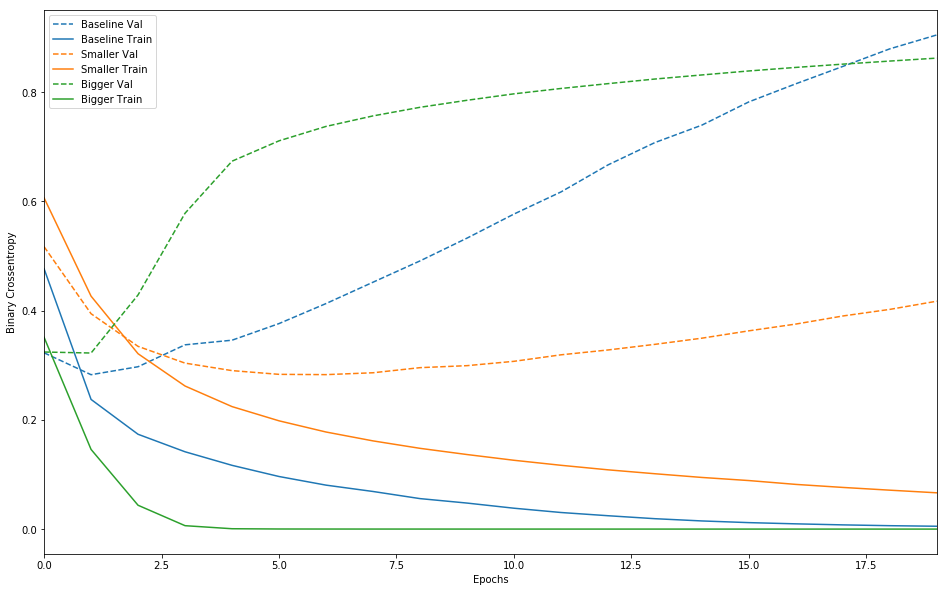

In [26]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [27]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5251 - acc: 0.8251 - binary_crossentropy: 0.4835 - val_loss: 0.3863 - val_acc: 0.8770 - val_binary_crossentropy: 0.3414
Epoch 2/20
 - 3s - loss: 0.3110 - acc: 0.9069 - binary_crossentropy: 0.2610 - val_loss: 0.3406 - val_acc: 0.8866 - val_binary_crossentropy: 0.2870
Epoch 3/20
 - 3s - loss: 0.2601 - acc: 0.9280 - binary_crossentropy: 0.2039 - val_loss: 0.3407 - val_acc: 0.8862 - val_binary_crossentropy: 0.2830
Epoch 4/20
 - 3s - loss: 0.2381 - acc: 0.9381 - binary_crossentropy: 0.1787 - val_loss: 0.3564 - val_acc: 0.8806 - val_binary_crossentropy: 0.2959
Epoch 5/20
 - 3s - loss: 0.2231 - acc: 0.9452 - binary_crossentropy: 0.1617 - val_loss: 0.3663 - val_acc: 0.8774 - val_binary_crossentropy: 0.3041
Epoch 6/20
 - 3s - loss: 0.2113 - acc: 0.9502 - binary_crossentropy: 0.1483 - val_loss: 0.3762 - val_acc: 0.8768 - val_binary_crossentropy: 0.3129
Epoch 7/20
 - 3s - loss: 0.2040 - acc: 0.9523 - binary_crossentropy:

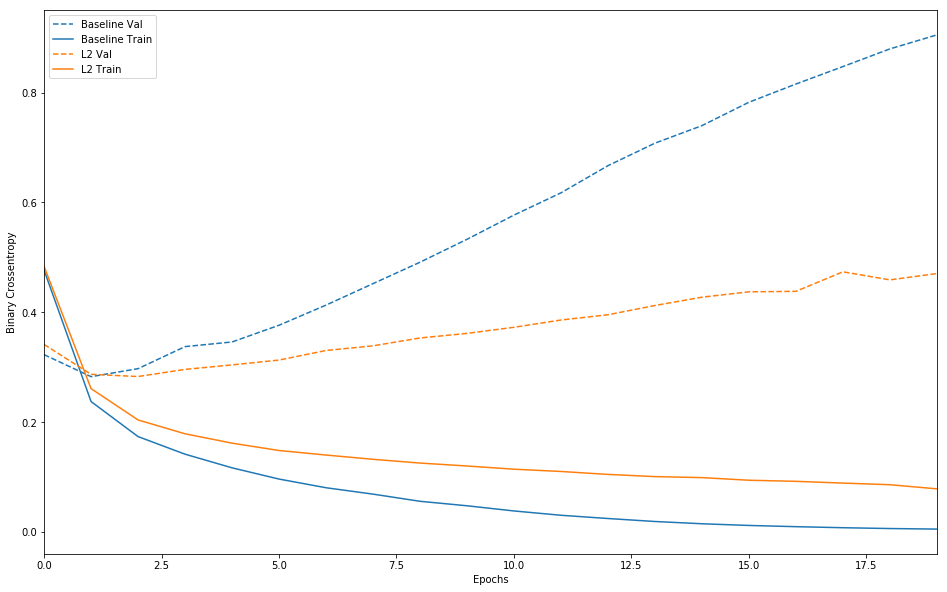

In [28]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

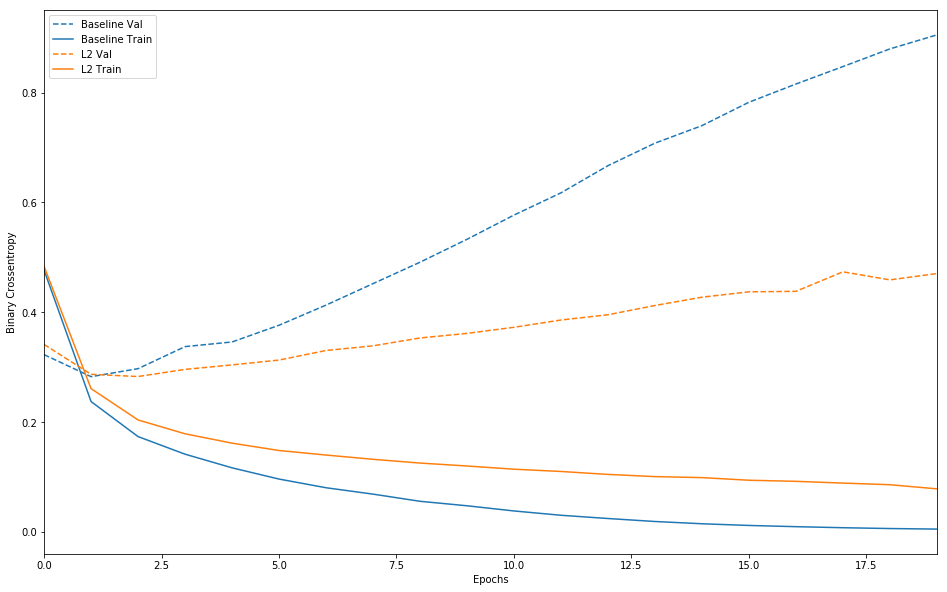

In [29]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [30]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6283 - acc: 0.6312 - binary_crossentropy: 0.6283 - val_loss: 0.4906 - val_acc: 0.8498 - val_binary_crossentropy: 0.4906
Epoch 2/20
 - 3s - loss: 0.4828 - acc: 0.7786 - binary_crossentropy: 0.4828 - val_loss: 0.3559 - val_acc: 0.8783 - val_binary_crossentropy: 0.3559
Epoch 3/20
 - 3s - loss: 0.3882 - acc: 0.8402 - binary_crossentropy: 0.3882 - val_loss: 0.3006 - val_acc: 0.8851 - val_binary_crossentropy: 0.3006
Epoch 4/20
 - 3s - loss: 0.3324 - acc: 0.8692 - binary_crossentropy: 0.3324 - val_loss: 0.2804 - val_acc: 0.8871 - val_binary_crossentropy: 0.2804
Epoch 5/20
 - 3s - loss: 0.2877 - acc: 0.8874 - binary_crossentropy: 0.2877 - val_loss: 0.2763 - val_acc: 0.8876 - val_binary_crossentropy: 0.2763
Epoch 6/20
 - 3s - loss: 0.2583 - acc: 0.8980 - binary_crossentropy: 0.2583 - val_loss: 0.2769 - val

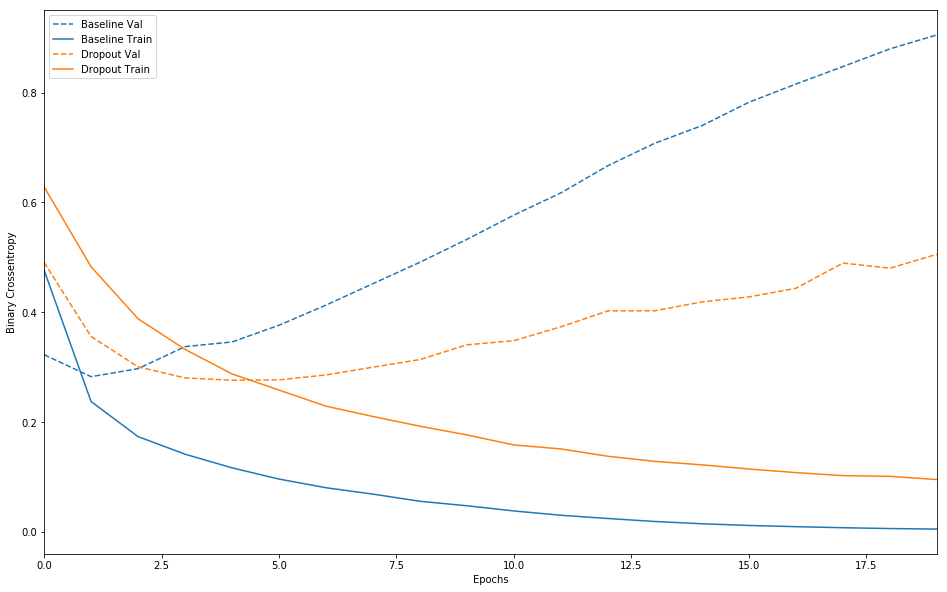

In [31]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])